# Tesla:Stock Price Analysis with Python

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly Tesla. We will learn how to use finance data to get information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history.


In [15]:
# importing important libraries
!pip install missingno
!pip install plotly
!pip install mplfinance

In [16]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import missingno as msno
import plotly.graph_objects as go
import mplfinance as mpf
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore', category=UserWarning)

# Load Data 

In [17]:
A = pd.read_csv("G:Data_Science_Vrashali/Descriptive Analysis with Python/Tesla_stock_Price.csv")     

# Data obsevation

In [18]:
A.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%


In [19]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3258 non-null   object 
 1   Price   3178 non-null   float64
 2   Open    3178 non-null   float64
 3   High    3178 non-null   float64
 4   Low     3178 non-null   object 
 5   Volume  3178 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 178.3+ KB


In [20]:
A.shape

(3258, 7)

In [21]:
print(A.shape)
print('-'*30)
print(A.columns)
print('-'*30)
print(A.head())
print('-'*30)
print(A.tail())
print('-'*30)

(3258, 7)
------------------------------
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')
------------------------------
       Date  Price   Open   High    Low   Volume    Chg%
0  1-Apr-11   1.78   1.83   1.88   1.77   42.98M  -3.78%
1  1-Apr-13   2.93   2.82   3.11   2.78  211.59M  15.81%
2  1-Apr-14  14.46  13.93  14.54  13.91  110.57M   4.03%
3  1-Apr-15  12.51  12.58  12.82   12.4   56.92M  -0.56%
4  1-Apr-16  15.84  16.32  16.53  15.55  239.96M   3.39%
------------------------------
           Date   Price    Open    High     Low   Volume    Chg%
3253  30-Sep-16   13.60   13.48   13.67    13.3   38.79M   1.64%
3254  30-Sep-19   16.06   16.20   16.27   15.74   89.19M  -0.50%
3255  30-Sep-20  143.00  140.44  144.64  140.16  144.44M   2.37%
3256  30-Sep-21  258.49  260.33  263.04  258.33   53.87M  -0.75%
3257  30-Sep-22  265.25  266.14  275.57  262.47   67.73M  -1.10%
------------------------------


In [22]:
{i:str(A[i].dtype) for i in A.columns if A[i].dtype== object}

{'Date': 'object', 'Low': 'object', 'Volume': 'object', 'Chg%': 'object'}

In [23]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3258 non-null   object 
 1   Price   3178 non-null   float64
 2   Open    3178 non-null   float64
 3   High    3178 non-null   float64
 4   Low     3178 non-null   object 
 5   Volume  3178 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 178.3+ KB


# Data Cleaning

Data type casting:The given data is needed type casting if  float data is not  there, so we created function
which will convert data into float otherwise mske it nan.

In [24]:
def low_fun(n):                                                   
    try:
        return float(n)
    except:
        return np.nan
    
def vol_fun(num):
    try:
        return float(num)
    except:
        return np.nan

In [25]:
#for date column
A['Date'] = pd.to_datetime(A['Date'],errors='coerce')
#for Low column
A['Low'] = A['Low'].apply(low_fun) 
# for Volume column 
A['Volume'] = A['Volume'].str.split('M').str.get(0).apply(vol_fun) 
# for change% column 
A['Chg%'] = A['Chg%'].str.split('%').str.get(0).astype('float32')

In [26]:
#Checking number of null values in each column
A.isnull().sum()

Date       80
Price      80
Open       80
High       80
Low       120
Volume    120
Chg%      120
dtype: int64

In [27]:
A['Price'].fillna(A['Price'].mean() ,inplace=True)
A['Open'].fillna(A['Open'].mean() ,inplace=True)
A['High'].fillna(A['High'].mean() ,inplace=True)
A['Low'].fillna(A['Low'].mean() ,inplace=True)
A['Volume'].fillna(A['Volume'].mean() ,inplace=True)
A['Chg%'].fillna(A['Chg%'].mean() ,inplace=True) 

A.dropna(subset={'Date'},inplace=True)
round(100*(A.isnull().sum()/len(A.index)), 2) 

Date      0.0
Price     0.0
Open      0.0
High      0.0
Low       0.0
Volume    0.0
Chg%      0.0
dtype: float64

In [28]:
#Calculating the data loss
100-round(100*len(A.index)/3258,2) 

2.4599999999999937

# data Exploration

What was the change in price of the stock over time?

Perform different time sampling

What was the daily return of the stock on average?

What was the moving average of the various stocks?

What was the correlation between different component of stocks'?

In [29]:
A.set_index('Date', inplace=True)
A.sort_index(inplace=True) 

In [30]:
A.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-06-30,1.59,1.72,2.03,1.55,257.92,0.00
2010-07-01,1.46,1.67,1.73,1.35,123.45,-8.18
2010-07-02,1.28,1.53,1.54,1.25,77.13,-12.33
2010-07-06,1.07,1.33,1.33,1.06,103.19,-16.41
2010-07-07,1.05,1.09,1.11,1.00,103.87,-1.87


In [31]:
A.describe()

,Price,Open,High,Low,Volume,Chg%
count,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000
mean,59.330355,59.363970,60.711009,57.884063,93.821612,0.222282
std,94.758509,94.855811,97.061127,92.393527,81.265055,3.598352
min,1.050000,1.080000,1.110000,1.000000,1.780000,-21.059999
25%,9.212500,9.272500,9.492500,8.970000,42.660000,-1.490000
50%,16.415000,16.415000,16.625000,16.160000,76.590000,0.130000
75%,32.632500,32.915000,34.257500,31.595000,117.295000,1.930000
max,409.970000,411.470000,414.500000,405.670000,914.080000,24.459999


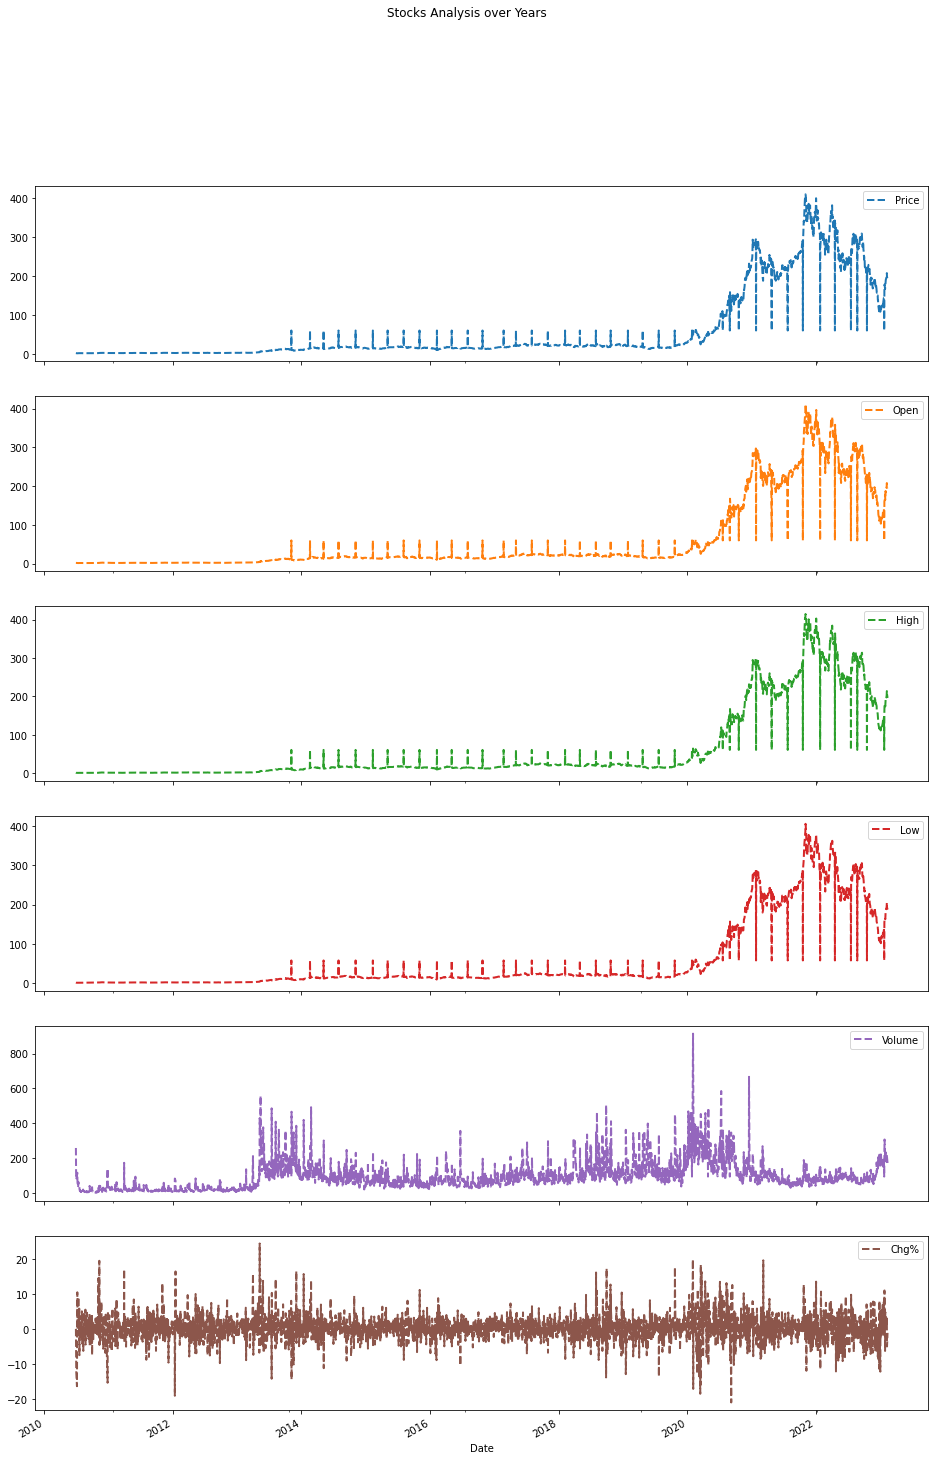

In [32]:
A.plot(subplots=True,figsize=(16,25),title='Stocks Analysis over Years',linestyle='--',linewidth=2)
plt.show() 

In [33]:
A = A.rename(columns={'Price':'Close'})
A1 = A[['Close','Open','High','Low','Volume']] 

Candlestick chart are also known as a Japanese chart. These are widely used for technical analysis in trading as they visualize the price size within a period. They have four points Open, High, Low, Close (OHLC). Candlestick charts can be created in python using a matplotlib module called mplfinance. 

Installation:
!pip install mplfinance
mplfinance.candlestick_ohlc()
This function is used to plot Candlestick charts.

Syntax: mplfinance.candlestick_ohlc(ax, quotes, width=0.2, colorup=’k’, colordown=’r’, alpha=1.0)
Parameters: 

ax: An Axes instance to plot to.
quotes: sequence of (time, open, high, low, close, …) sequences.
width: Fraction of a day for the rectangle width.
colorup: The color of the rectangle where close >= open.
colordown: The color of the rectangle where close < open.
alpha: (float) The rectangle alpha level.
Returns: returns (lines, patches) where lines are a list of lines added and patches is a list of the rectangle patches added.

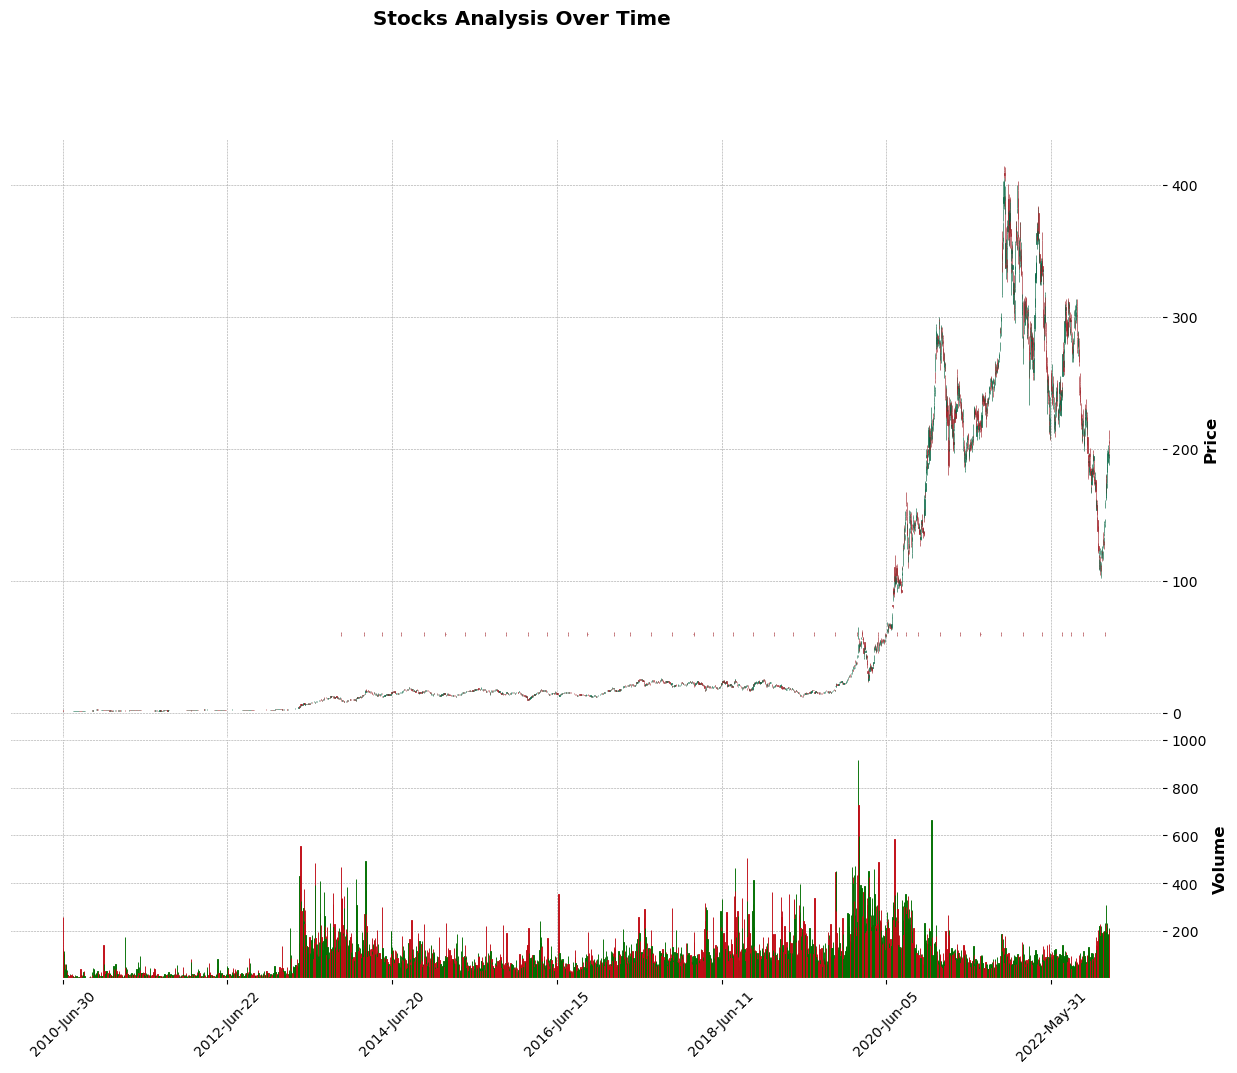

In [34]:
# create a custom style for the chart

custom_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 10})
# plot the candlestick chart
mpf.plot(A, type='candle', style=custom_style, volume=True, ylabel='Price',figsize=(16,12),title=('Stocks Analysis Over Time'))
mpf.show() 

In [35]:
# Which is the date of the lowest price of the stock? 
y = A[A['Close'] == A['Close'].min()].index[0]   
print(y.day_name(),y.day,'th',y.month_name(),y.year) 

Wednesday 7 th July 2010


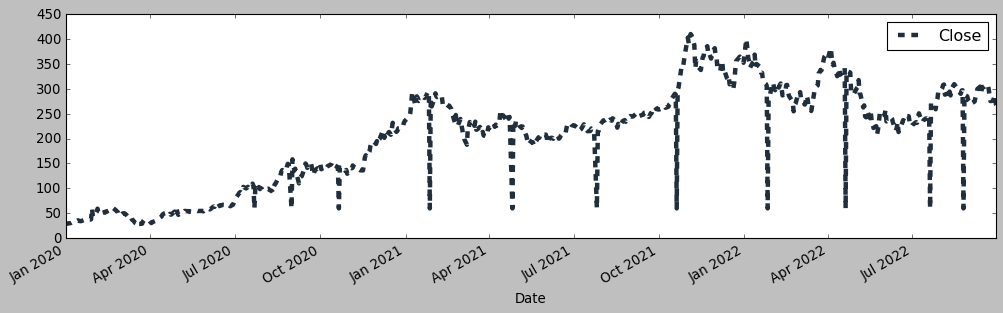

In [36]:
#show the graph ,rose subsequently
# apply xlimit and y limit
plt.style.use('classic')
A['Close'].plot(xlim=['2020/01/01','2022/09/29'],ls='--',lw=4, figsize=(15,4),color='#212f3d') 
plt.legend() 
plt.show() 

In [37]:
# tesla stocks open for 2021 
share_open = A.loc['2021/01/01':'2021/12/31']['Open']  
index = share_open.index 
share_open.head(5) 

Date
2021-01-04    239.82
2021-01-05    241.22
2021-01-06    252.83
2021-01-07    259.21
2021-01-08    285.33
Name: Open, dtype: float64

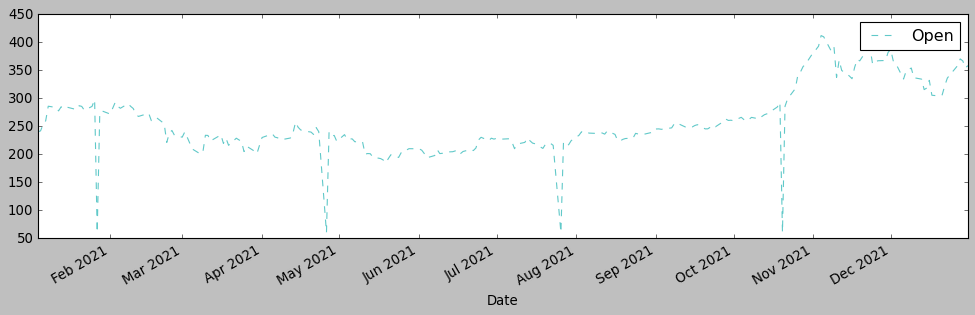

In [38]:
share_open.plot(ls='--', figsize=(15,4),color='#61c9c9') 
plt.legend() 
plt.show() 

Perform different time sampling
In time series, data consistency is of prime importance, resampling ensures that the data is distributed with a consistent frequency. Resampling can also provide a different perception of looking at the data, in other words, it can add additional insights about the data based on the resampling frequency.

In [39]:
# minimum share price in evey year end
A.resample(rule='A').min() 

,Close,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-12-31,1.050000,1.080000,1.110000,1.000000,1.780000,-16.410000
2011-12-31,1.460000,1.450000,1.480000,1.410000,3.590000,-9.650000
2012-12-31,1.520000,1.770000,1.790000,1.510000,5.470000,-19.150000
2013-12-31,2.190000,2.210000,2.230000,2.140000,6.630000,-14.500000
2014-12-31,9.290000,9.370000,9.800000,9.110000,20.000000,-11.250000
2015-12-31,12.330000,12.390000,12.620000,12.090000,10.650000,-8.880000
2016-12-31,9.870000,9.490000,10.470000,9.400000,24.890000,-10.450000
2017-12-31,14.470000,14.320000,14.690000,14.060000,32.800000,-7.230000
2018-12-31,16.700000,16.850000,17.360000,16.310000,46.210000,-13.900000


In [40]:
# maximum share price in evey year
grid = A.resample(rule='A').max() 
grid

,Close,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-12-31,2.360000,2.390000,2.430000,2.320000,257.92,19.510000
2011-12-31,2.330000,2.310000,2.330000,2.270000,172.84,17.090000
2012-12-31,2.530000,2.550000,2.660000,2.470000,85.27,16.450001
2013-12-31,59.687725,59.743634,61.025938,57.884063,557.46,24.459999
2014-12-31,59.687725,59.743634,61.025938,57.884063,491.96,15.720000
2015-12-31,59.687725,59.743634,61.025938,57.884063,234.74,11.160000
2016-12-31,59.687725,59.743634,61.025938,57.884063,356.14,8.800000
2017-12-31,59.687725,59.743634,61.025938,57.884063,296.87,7.280000
2018-12-31,59.687725,59.743634,61.025938,57.884063,504.75,17.340000


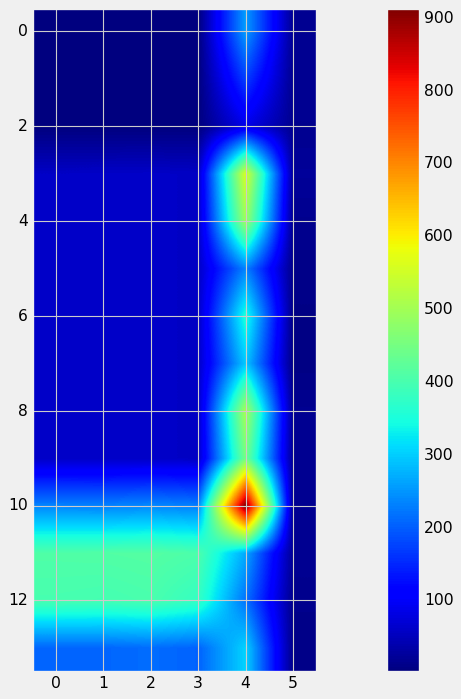

In [41]:
# Showing the volume of 2021 is very high
plt.style.use('fivethirtyeight') 
plt.figure(figsize=(20,10))
plt.imshow(grid)
plt.colorbar()

<AxesSubplot:xlabel='Date'>

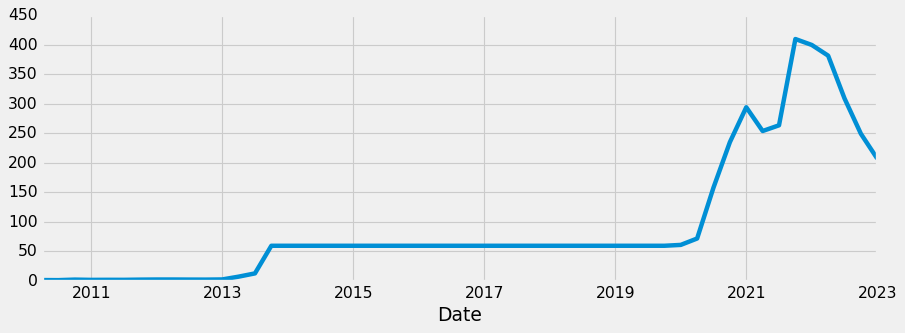

In [42]:
# maximum share price in evey quarter start
A.resample(rule='QS').max()['Close'].plot(figsize=(12,4)) 

<AxesSubplot:xlabel='Date'>

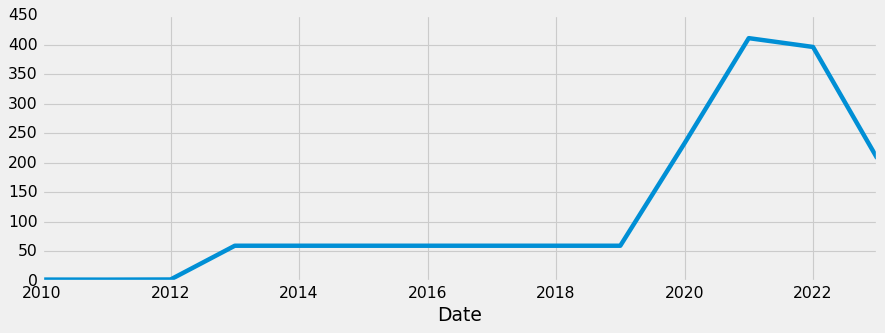

In [43]:
# maximum share open in evey Business year end
A.resample(rule='BA').max()['Open'].plot(figsize=(12,4)) 

In [44]:
# mean share volume in every month
A.resample(rule='M').mean()['Open']

Date
2010-06-30      1.720000
2010-07-31      1.338095
2010-08-31      1.303636
2010-09-30      1.385238
2010-10-31      1.381905
                 ...    
2022-10-31    216.503506
2022-11-30    193.478571
2022-12-31    155.896190
2023-01-31    128.206182
2023-02-28    192.790000
Freq: M, Name: Open, Length: 153, dtype: float64

<AxesSubplot:xlabel='Date'>

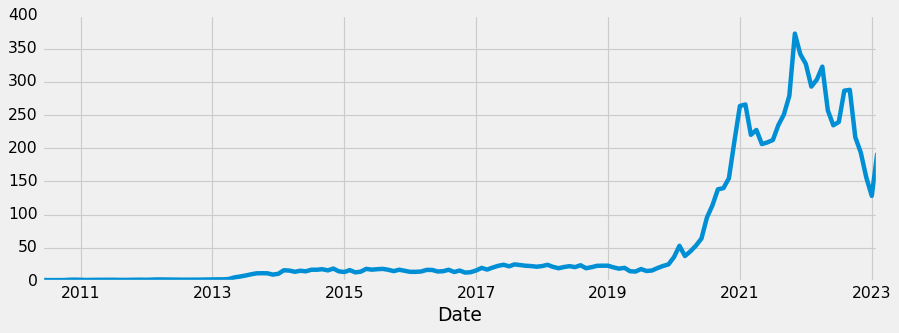

In [45]:
# plot
A.resample(rule='M').mean()['Open'].plot(kind='line',figsize=(12,4)) 

What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [46]:
A['Open: 10 days rolling']= A['Open'].rolling(10).mean() 
A['Open: 30 days rolling']= A['Open'].rolling(30).mean() 
A['Open: 50 days rolling']= A['Open'].rolling(50).mean() 

Text(0.5, 0, 'Years')

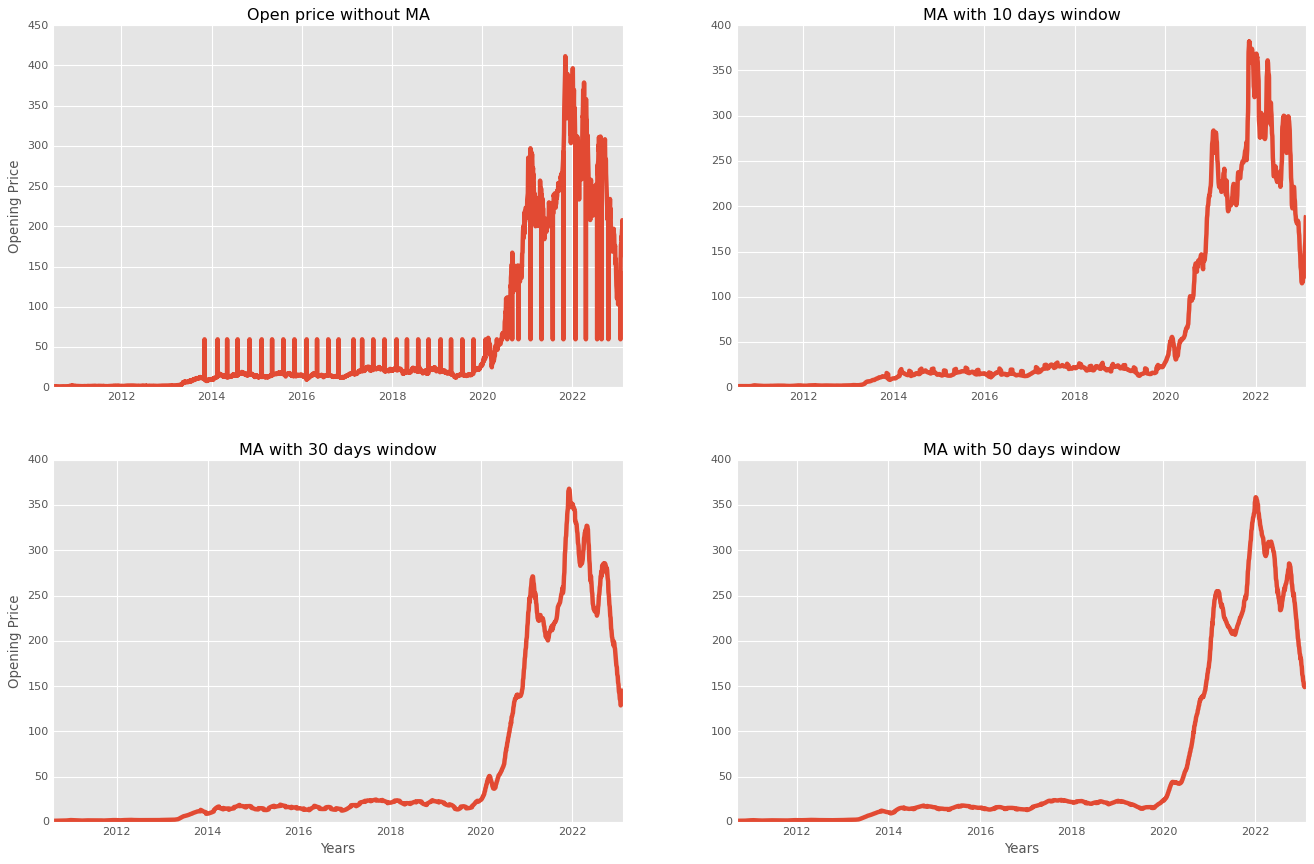

In [47]:
plt.style.use('ggplot') 

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(18,12), )
ax[0,0].plot(A.index,A['Open'])  
ax[0,0].set_title('Open price without MA')
ax[0,0].set_ylabel('Opening Price') 


ax[0,1].plot(A.index,A['Open: 10 days rolling'])  
ax[0,1].set_title('MA with 10 days window')

ax[1,0].plot(A.index,A['Open: 30 days rolling'])
ax[1,0].set_title('MA with 30 days window')
ax[1,0].set_ylabel('Opening Price') 
ax[1,0].set_xlabel('Years') 



ax[1,1].plot(A.index,A['Open: 50 days rolling'])  
ax[1,1].set_title('MA with 50 days window')
ax[1,1].set_xlabel('Years') 

What was the daily return of the stock on average
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the stock.

<AxesSubplot:xlabel='Date', ylabel='Change(%)'>

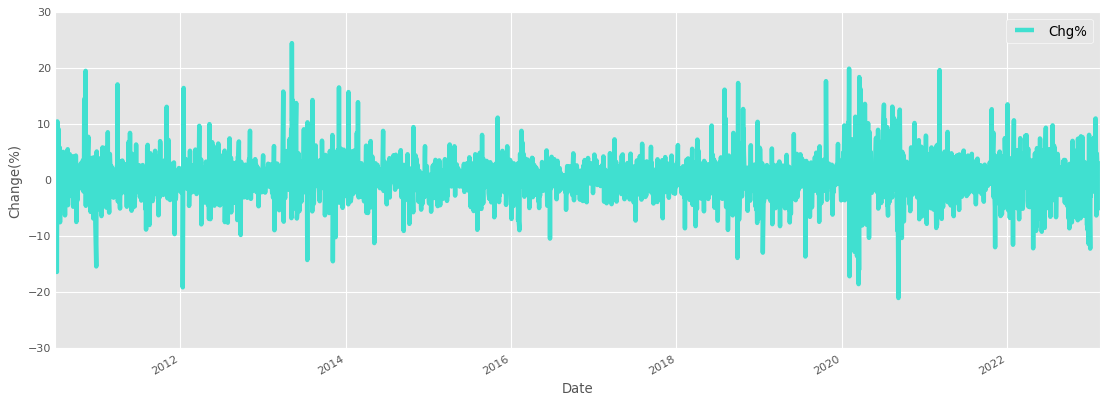

In [48]:
A['Chg%'].plot(kind='line',ylabel='Change(%)',figsize=(15,6),legend=True,color='Turquoise')  

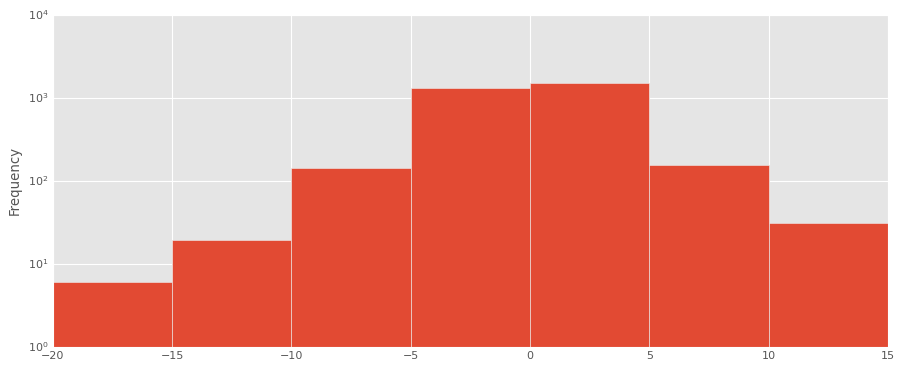

In [49]:
# with histogram 
A['Chg%'].plot(kind='hist',xlabel='Daily Returns',bins=[-20,-15,-10,-5,0,5,10,15],figsize=(12,5))
plt.yscale('log') 

#What was the correlation between stocks closing and opening prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor.

<AxesSubplot:xlabel='Close', ylabel='Open'>

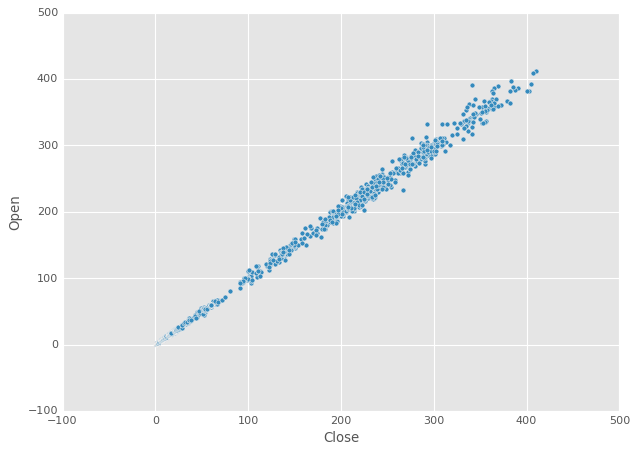

In [50]:
# between opening and closing price 
A[['Close','Open']].plot(kind='scatter',x='Close',y='Open') 

<AxesSubplot:xlabel='High', ylabel='Low'>

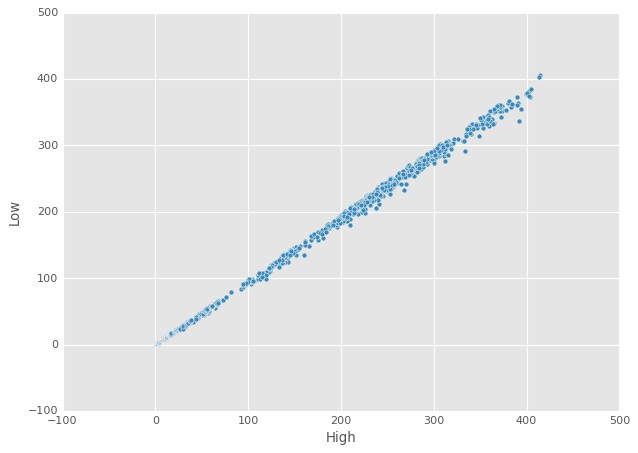

In [51]:
A.plot(kind='scatter',x='High',y='Low')

# End